<a href="https://colab.research.google.com/github/YNNJN/ML_Bigdata/blob/master/8_%EB%8B%A4%EC%B8%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D%20(Tensorflow%2C%20Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/YNNJN/ML_Bigdata.git

Cloning into 'ML_Bigdata'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 63 (delta 26), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (63/63), done.


In [0]:
!ls -ltr

total 8
drwxr-xr-x 1 root root 4096 Mar 18 16:23 sample_data
drwxr-xr-x 3 root root 4096 Mar 22 12:11 ML_Bigdata


In [0]:
from google.colab import drive
drive.mount('/content/MLTutorial')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MLTutorial


# 다중 분류 신경망

- multiclass classification neural network
- softmax function, cross entropy loss function을 사용
- 마지막 출력층에 분류할 클래스만큼 뉴런을 배치함
- 즉 이진분류는 양성 클래스에 대한 확률 하나만 출력하고, 다중 분류는 각 클래스에 대한 확률값을 출력함

### 다중 분류의 문제점
- 활성화 출력의 합이 1이 아니면 비교하기 어려움
- 따라서 소프트맥스 함수를 적용해 출력 강도를 정규화함
    - 출력이 늘어나는만큼 분모의 지수 함수가 늘어남
- 이를 통해 다중 분류에서 출력층을 통과한 값들은 소프트맥스 함수를 거치며 적절함 확률값으로 변함

# 크로스 엔트로피 손실 함수
- 로지스틱 손실 함수의 일반화 버전

![mathematical expression](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FAysJk%2FbtqCSfM6V7A%2Ff7yKR5SuhDwIP4l2eVyIUk%2Fimg.jpg)


#### 왜 크로스 엔트로피를 쓸까?
[참조_설진석님 블로그](https://theeluwin.postype.com/post/6080524)
- 딥러닝의 목표는 자연에 있는 어떠한 진분포를, 신경망이 표현해줄 가짜분포를 사용해서 모사하고 싶고, 얼마나 모사를 잘 했는지는 KL-발산이 얼마나 낮은가로 표현할 수 있으며, 분류 문제에선 진분포가 특이한 모양이라 크로스 엔트로피를 사용해도 동일한 값이 나옴
- 꼭 크로스 엔트로피의 형태를 고집하는 이유는 젠센 부등식으로 분포 p를 이용해서 기댓값을 걸어주는 방식으로 확인 가능
    - CE(Xa, Ya) = f(sigma(p(c)q(c))
    - 분포 p와 q가 같은 사건일 때 확률값(곱셈공식 -> 덧셈공식), 즉 Xa와 Ya가 같은 값을 가질 확률, 위의 식 = f(P(Xa = Ya)
- 최종 식은 e^(CE(Xa, Ya) <= P(Xa, Ya)
    - 즉 두 랜덤 변수가 같을 확률의 최소값!!
    - 진짜 클래스 번호인 Xa, 모델이 예측한 클래스 번호 Ya, 이 둘이 같을 확률은 바로 정답을 맞췄을 확률의 하한을 의미
    - 정답률에 하한이 있다는 것이고, 그 하한이 바로 크로스 엔트로피에 의해 결정됨
    - 하한이 있다는 것은 정답률을 어느정도 보장한다는 것
    - 손실 함수 값이 1이 나온다면 현재 정답률이 1/e 즉 36%는 되는구나 (손실함수 값의 단위가 중요한 이유이기도)
- 지수함수의 꼴을 생각하면, 크로스 엔트로피 값이 작을수록 좌변이 커짐
    - 크로스 엔트로피가 0이 되는 순간 -> 좌변이 1이 됨
    - 이 때 두 랜덤변수가 같은 값을 가질 확률 역시 1이 됨
    - 이는 진분포를 완벽하게 모사해낸 순간이 됨

### 활성화 함수 사용 이유
- 데이터를 비선형으로 바꾸기 위해 (현실의 데이터는 n차원 비선형 분포로 존재함)

### sigmoid function의 문제점
- x값의 변화량 대비 y값의 변화량이 작아 학습이 더디게 진행됨
- 깊이가 깊어질수록 데이터의 양극화가 심해지고 결과값이 항상 양수라 backprop으로 학습할 시 gradient 값이 부호 편향적
- 1보다 항상 작기 때문에 신경망이 깊어질수록 끝없이 작아짐
- 지수함수를 사용하여 계산이 오래 걸림

### 경사하강법 적용 위해 크로스 엔트로피 손실함수 미분
- 분류 문제에서 타깃의 합은 정답 타깃이 1이고 나머지는 0이므로 항상 1
- 크로스 엔트로피 손실 함수의 미분 결과는 dL/dz = -(y-a)
- 로지스틱 손실함수의 미분과 정확히 일치함

### 다중분류신경망 구현하기
- 이진분류 알고리즘에 소프트맥스 함수만 추가
- MinibatchNetwork class를 확장하여 구현함

In [0]:
#소프트맥스 함수 추가하기
import numpy as np
def sigmoid(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
def softmax(self, z):
        # 소프트맥스 함수
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1) #axis=1 => 1기준

In [0]:
#가중치 초기화하기
def init_weights(self, n_features, n_classes):
        ...
        self.w2 = np.random.normal(0, 1, (self.units, n_classes))   #(은닉층의 크기, 클래스 개수)
        self.b2 = np.zeros(n_classes) #0으로 초기화

In [0]:
#fit() 수정
def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1]) #클래스의 개수를 매개변수 값으로 넘겨줌

        for i in range(epochs):
            loss = 0
            print('.', end='') #학습이 돌아가고있는지 확인하는 용도, 케라스에는 기본으로 내장된 기능
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            self.update_val_loss(x_val, y_val)

In [0]:
#predict() 수정
#출력층에서 계산된 선형계산만으로 클래스 예측 가능
def predict(self, x):
        z = self.forpass(x)
        return np.argmax(z, axis=1)  #정방향 출력 중 가장 큰 값의 인덱스를 반환, 이를 추후 예측 클래스로 사용함

In [0]:
#score() 수정
def score(self, x, y):
        return np.mean(self.predict(x) == np.argmax(y, axis=1)) #예측과 타깃의 열 벡터 비교

In [0]:
#검증손실 계산하기
#활성화함수 적용하고, 크로스엔트로피와 규제 손실을 더해 리스트에 추가함
def update_val_loss(self, x_val, y_val):
        ...
        a = self.softmax(z)
        ...
        val_loss = np.sum(-y_val*np.log(a))
        ...

In [0]:
#전체 코드
class MultiClassNetwork:
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        self.units = units
        self.batch_size = batch_size
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.a1 = None
        self.losses = []
        self.val_losses = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1 #첫번째 층의 선형 식 계산
        self.a1 = self.sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2  #두번째 층의 선형식 계산
        return z2

    def backprop(self, x, err):
        m = len(x) #샘플 개수
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        a = 1 / (1 + np.exp(-z))
        return a
    
    def softmax(self, z):
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)
 
    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0, 1, (n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0, 1, (self.units, n_classes))
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])

        for i in range(epochs):
            loss = 0
            print('.', end='')
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            self.update_val_loss(x_val, y_val)

    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size #미니배치 횟수
        if length % self.batch_size:
            bins += 1
        indexes = np.random.permutation(np.arange(len(x)))
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   #batch_size만큼 슬라이싱하여 반환
            
    def training(self, x, y):
        m = len(x) #샘플 개수
        z = self.forpass(x)
        a = self.softmax(z)
        err = -(y - a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)
        return np.argmax(z, axis=1)
    
    def score(self, x, y):
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.softmax(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

# 의류 이미지 분류

### 훈련 데이터 준비
- fashion MNIST 데이터세트 사용
- MNIST 데이터베이스란 손으로 쓴 숫자들로 이루어진 대형 데이터베이스를 말함
- 다양한 화상처리 시스템을 트레이닝하기 위해 일반적으로 사용됨
- [참조_fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 42kB/s 
     |████████████████████████████████| 501kB 14.7MB/s 
     |████████████████████████████████| 4.3MB 32.1MB/s 


In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'1.15.0'

In [0]:
#데이터세트 불러오기
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
fashion = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
#입력 데이터 확인하기
print(x_train_all[0])
print(y_train_all[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

- x_train_all는 0에서 255 사이의 값을 갖는 28x28 크기의 NumPy 어레이를 갖는 어레이, 즉 색을 표현하는 값
- y_train_all는 0에서 9까지의 정수 값을 갖는 어레이
- 0에서 9까지의 정수 값은 이미지(옷)의 클래스를 나타내는 레이블
    - 각각의 레이블과 클래스는 다음과 같음
        - 0 : T-shirt/top
        - 1 : Trouser
        - 2 : Pullover
        - 3 : Dress
        - 4 : Coat
        - 5 : Sandal
        - 6 : Shirt
        - 7 : Sneaker
        - 8 : Bag
        - 9 : Ankel boot


In [0]:
#훈련세트의 크기 확인하기
print(x_train_all.shape, y_train_all.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


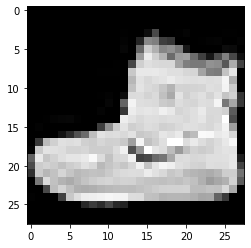

In [0]:
#샘플이미지 확인
import matplotlib.pyplot as plt
plt.imshow(x_train_all[0], cmap='gray')
plt.show()

- 맷플롯립 패키지는 colormap을 이용해 이미지를 그리며, cmap 매개변수로 설정 가능
- cmap 매개변수의 기본 설정 -> viridis(픽셀을 짙은 녹색에서 밝은 노랑 사이로 표현)
- fashion MNIST는 흑백이미지이므로 cmap 매개변수를 gray로 지정


In [0]:
#타깃 분포 확인
print(y_train_all[:10])
np.bincount(y_train_all)

[9 0 0 3 0 2 7 2 5 5]


array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [0]:
#훈련세트와 검증세트 고르게 나누기
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [0]:
#확인
np.bincount(y_train)
np.bincount(y_val)

array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200])

In [0]:
#데이터 전처리
#0에서 255 사이의 값의 데이터를 0에서 1 사이의 값을 갖도록 변환
x_train = x_train / 255
x_val = x_val / 255

In [0]:
#훈련세트와 검증세트의 차원 변경
#28x28 크기의 2차원 배열 샘플을 1차원 배열로 변환
#2, 3 차원을 합친 다음 784(28*28)의 길이로 펼침, 즉 이미지의 픽셀을 풀어 한 줄로 이어붙임
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

In [0]:
#데이터의 차원이 바뀌었는지 확인
print(x_train.shape, x_val.shape)

(48000, 784) (12000, 784)


### 타깃 데이터 준비

- fashion MNIST 데이터세트는 10개의 클래스로 구성되어있으므로, 출력 뉴런의 개수도 10개로 타깃값에 대응되어야
- 하지만 y_train, y_val에 저장된 값들은 0~9 사이의 정수값 한 개로 10개의 출력 뉴런에 대응되지 않기 때문에, 타깃 데이터를 변형함
- 정답 타깃의 값 => 1, 나머지 타깃의 값 => 0

#### 1. one-hot encoding
- 타깃을 one-hot encoding으로 변환
- 타깃의 정수값에 해당하는 원소는 1, 나머지 원소는 모두 0으로 하여 10개의 원소를 가진 배열로 만듦
- 이를 통해 타깃값을 가지고있는 1차원 정수 배열 -> 2차원 배열
- 단순하게 벡터화할 수 있는 것이 **장점**, 직관적
- 타깃 범주가 클수록 크기가 커지는 것이 **단점**

#### 2. 배열의 각 원소를 뉴런의 출력값과 비교
- 가장 큰 출력값의 인덱스가 타깃과 동일한지 비교함

In [0]:
#사이킷런이 제공하는 원 핫 인코딩 도구, LabelBinarizer() 이용
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
lb.fit_transform([0, 1, 3, 1])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [0]:
#텐서플로가 제공하는 원 핫 인코딩 도구, to_categorical() 이용
#keras.utils 모듈에 존재, 문자열로 된 레이블은 인코딩 x
tf.keras.utils.to_categorical([0, 1, 3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [0]:
#차원 확인
#1차원 -> 2차원
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)
print(y_train_encoded.shape, y_val_encoded.shape)

(48000, 10) (12000, 10)


In [0]:
#인코딩 제대로 되었는지 확인
print(y_train[0], y_train_encoded[0])

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 다중 분류 신경망 훈련하기
- 훈련세트 x_train, y_train_encoded
- 검증세트 x_val, y_val_encoded

In [0]:
#위에서 구현한 MultiClassNetwork 클래스 이용
fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(x_train, y_train_encoded, x_val=x_val, y_val=y_val_encoded, epochs=40)

........................................

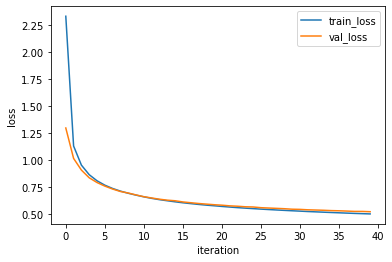

In [0]:
#훈련 손실, 검증 손실 그래프와 훈련 모델 점수 확인
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [0]:
fc.score(x_val, y_val_encoded)

0.8150833333333334

In [0]:
#위 신경망을 케라스로 구현 (간단!)
#신경망 모델을 만듦
model = tf.keras.models.Sequential()
#완전 연결층을 추가
model.add(tf.keras.layers.Dense(1))
#옵티마이저와 손실 함수를 지정
model.compile(optimizer='sgd', loss='mse')
#훈련 데이터를 사용하여 에포크 횟수만큼 훈련
model.fit(x_train, y_train, epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 44us/sample - loss: nan
Epoch 2/10
48000/48000 [==============================] - 1s 31us/sample - loss: nan
Epoch 3/10
48000/48000 [==============================] - 1s 31us/sample - loss: nan
Epoch 4/10
48000/48000 [==============================] - 1s 31us/sample - loss: nan
Epoch 5/10
48000/48000 [==============================] - 1s 31us/sample - loss: nan
Epoch 6/10
48000/48000 [==============================] - 1s 30us/sample - loss: nan
Epoch 7/10
48000/48000 [==============================] - 1s 30us/sample - loss: nan
Epoch 8/10
48000/48000 [==============================] - 1s 31us/sample - loss: nan
Epoch 9/10
48000/48000 [==============================] - 2s 32us/sample - loss: nan
Epoch 10/10
48000/48000 [==============================] - 1s 30us/sample - loss: nan


# 텐서플로와 케라스로 신경망 만들기

### Keras

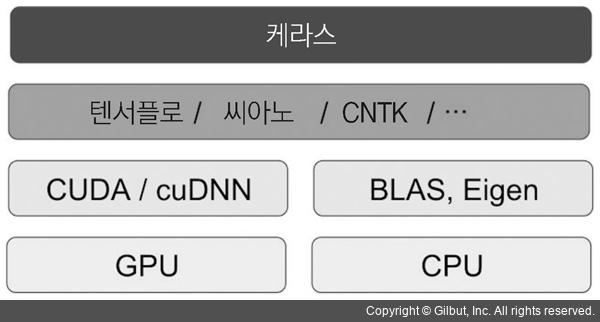)

출처 [케라스 소개](https://tensorflow.blog/%EC%BC%80%EB%9D%BC%EC%8A%A4-%EB%94%A5%EB%9F%AC%EB%8B%9D/3-2-%EC%BC%80%EB%9D%BC%EC%8A%A4-%EC%86%8C%EA%B0%9C/)


- 동일한 코드로 CPU와 GPU에서 실행 가능
- 어떤 네트워크 구조도 만들 수 있어 어떤 딥러닝 모델에도 적합함
- 인공신경망 모델을 만들기 위한 Sequential 클래스(순차적으로 층을 쌓은 신경망 모델)와 완전연결층을 만들기 위한 Dense class(모델에 포함된 완전연결층)를 제공함
    - 은닉층과 출력층을 Dense 클래스의 객체로 구성
    - 각각의 객체를 Sequential 클래스 객체에 추가
    - 층을 명확하게 구분하기 때문에 층의 다른 층으로의 교체가 쉬움
    - model = Sequential([Dense(...), ...])

In [0]:
#Sequential 객체(모델) 생성
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

#add() 메서드 사용해 출력층을 모델에 추가
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [0]:
#최적화 알고리즘과 손실함수 지정
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

- 훈련의 최적화 알고리즘으로 경사하강법을, 손실함수로 크로스 엔드로피 손실함수를 사용 (compilie() 메서드로 지정)
- optimizer는 데이터와 손실 함수를 바탕으로 모델의 가중치와 절편을 업데이트하는 방식을 말함
- optimizer 매개변수 값으로 'sgd'를 지정 시 기본으로 경사하강법을 최적화 알고리즘으로 사용함 (이 때 학습률 기본값 = 0.01)

In [0]:
#모델 훈련하기
history = model.fit(x_train, y_train_encoded, epochs=40, validation_data=(x_val, y_val_encoded))

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 3s 60us/sample - loss: 1.3999 - acc: 0.6377 - val_loss: 0.9716 - val_acc: 0.7364
Epoch 2/40
48000/48000 [==============================] - 3s 60us/sample - loss: 0.8487 - acc: 0.7433 - val_loss: 0.7543 - val_acc: 0.7613
Epoch 3/40
48000/48000 [==============================] - 3s 59us/sample - loss: 0.7130 - acc: 0.7641 - val_loss: 0.6646 - val_acc: 0.7827
Epoch 4/40
48000/48000 [==============================] - 3s 59us/sample - loss: 0.6468 - acc: 0.7812 - val_loss: 0.6122 - val_acc: 0.7948
Epoch 5/40
48000/48000 [==============================] - 3s 60us/sample - loss: 0.6044 - acc: 0.7940 - val_loss: 0.5758 - val_acc: 0.8041
Epoch 6/40
48000/48000 [==============================] - 3s 59us/sample - loss: 0.5743 - acc: 0.8033 - val_loss: 0.5515 - val_acc: 0.8102
Epoch 7/40
48000/48000 [==============================] - 3s 60us/sample - loss: 0.5512 - acc: 0.8098 - val_loss: 0.

In [0]:
#손실과 정확도 그래프 그리기
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


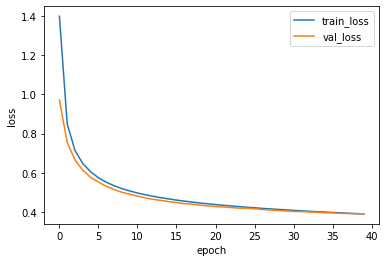

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

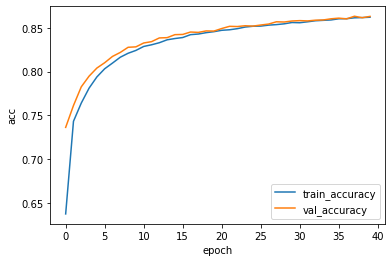

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [0]:
#검증세트 정확도 계산
loss, acc = model.evaluate(x_val, y_val_encoded, verbose=0)
print(acc)

0.863
